<a href="https://colab.research.google.com/github/rafarthan/capstone_project_danantara_sentiment_analysis/blob/main/capstone_project_IBMGranite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Menghubungkan Google Colab ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Memasang pustaka replicate dan pandas
!pip install -q pandas
!pip install -q langchain_community
!pip install -q replicate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('belajaribm')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [4]:
import pandas as pd

# Path dataset
unlabeled_path = '/content/drive/MyDrive/PSDM/DANANTARA LENGKAP.xlsx'

# Baca data
df_unlabeled = pd.read_excel(unlabeled_path)

# Contoh isi data
print(df_unlabeled.head())


                                           full_text  Sentimen
0  Danantara 1.000 T https://t.co/ICdT3EFvH3 #Dah...       NaN
1  Prabowo Luncurkan Danantara 24 Februari Kelola...       NaN
2  Melucuti Wewenang Erick Thohir Lewat Super Hol...       NaN
3  Dikabarkan Bakal jadi Kepala Danantara yang Ba...       NaN
4  Prabowo Luncurkan Danantara 24 Februari Kelola...       NaN


In [5]:
from langchain_community.llms import Replicate

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    replicate_api_token=os.environ["REPLICATE_API_TOKEN"]
)


In [8]:
import pandas as pd
import time

# 1. Baca file Excel
df = pd.read_excel("/content/drive/MyDrive/PSDM/DANANTARA LENGKAP.xlsx")
texts = df['full_text'].dropna().tolist()

# 2. Siapkan batch
batch_size = 5
batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]

# 3. List untuk menyimpan hasil
all_results = []

for batch_num, batch in enumerate(batches, start=1):
    reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(batch)])
    prompt = f"""
Klasifikasikan review ini menjadi positif, negatif, atau netral:
{reviews_text}
"""

    # 4. Kirim ke model Granite
    response = output.invoke(prompt)  # pastikan output sudah diinisialisasi model Granite

    print(f"\n=== Batch {batch_num} ===")
    print(response)

    # 5. Simpan ke list (1 baris untuk tiap teks)
    for text, pred in zip(batch, response.split("\n")):
        all_results.append({
            "full_text": text,
            "predicted_label": pred.strip()
        })

    time.sleep(10)  # jeda untuk hindari rate limit

# 6. Simpan hasil ke Excel
df_results = pd.DataFrame(all_results)
df_results.to_excel("/content/drive/MyDrive/PSDM/LENGKAP/DANANTARA_PREDIKSI.xlsx", index=False)

print("\n✅ Hasil prediksi sudah disimpan ke DANANTARA_PREDIKSI.xlsx")


Output streaming akan dipotong hingga 5000 baris terakhir.
Based on the provided reviews, here's a classification into positive, negative, or neutral:

1. Neutral: This review introduces Alfiansyah Putra Danantara and his father Rizal Danantara, a multinational corporation owner with 100 companies and thousands of employees. It doesn't express clear positive or negative sentiment.

2. Negative: This review criticizes Danantara regarding transparency and accountability, implying a lack thereof. It also makes accusations about corruption and tax evasion, indicating a negative sentiment.

3. Neutral: This is a request for clarification about Danantara, so it's neutral as it doesn't express any clear positive or negative opinion.

4. Negative: This review expresses concerns about Danantara's management of BUMN (state-owned enterprises) projects, suggesting potential negative impacts on consumers.

5. Negative: This review criticizes Danantara's focus on large-scale projects rather than eve

ReplicateError: ReplicateError Details:
status: 502

In [ ]:
import pandas as pd
import time

# 1. Baca file Excel
df = pd.read_excel("/content/drive/MyDrive/PSDM/DANANTARA LENGKAP.xlsx")
texts = df['full_text'].dropna().tolist()

# 2. Siapkan batch
batch_size = 5
batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]

# 3. List untuk menyimpan hasil
all_results = []

for batch_num, batch in enumerate(batches, start=1):
    reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(batch)])
    refined_prompt = f"""
STEP 1: Klasifikasikan cuitan warga Indonesia di aplikasi X yang merespons rencana pendirian Danantara oleh pemerintah ke: Positif: fokus pada harapan danantara, apresiasi pemerintah, dan pernyataan yang membela Danantara. Negatif: fokus pada kekhawatiran masyarakat terjadinya korupsi pada danantara, protes terkait APBN yang diefsiensi untuk Danantara, dan ketidakpercayaan masyarakat terhadap SDM yang megelola seperti Jokowi. Netral:fokus pada informasi yang mencantumkan link-link tidak jelas, pernyataan yang bersifat informatif, dan cuitan yang bersifat pertanyaan.  STEP 2: Untuk setiap cuitan, identifikasi alasan utama mengapa itu diaggap sebagai positif, negatif, atau netral. Respon dengan format: Text: [texts] Label: [positif/negatif/netral] Reason:[hasil identifikasi STEP 2]. Kamu hanya boleh merespon dengan bahasa Indonesia:
{reviews_text}
"""

    # 4. Kirim ke model Granite
    response = output.invoke(refined_prompt)  # pastikan output sudah diinisialisasi model Granite

    print(f"\n=== Batch {batch_num} ===")
    print(response)

    # 5. Simpan ke list (1 baris untuk tiap teks)
    for text, pred in zip(batch, response.split("\n")):
        all_results.append({
            "full_text": text,
            "predicted_label": pred.strip()
        })

    time.sleep(10)  # jeda untuk hindari rate limit

# 6. Simpan hasil ke Excel
df_results = pd.DataFrame(all_results)
df_results.to_excel("/content/drive/MyDrive/PSDM/LENGKAP/DANANTARA_REFINED PROMPT.xlsx", index=False)

print("\n✅ Hasil prediksi sudah disimpan ke DANANTARA_REFINED PROMPT.xlsx")


In [9]:
import pandas as pd
import time
import re

# 1) Baca file Excel
df = pd.read_excel("/content/drive/MyDrive/PSDM/DANANTARA LENGKAP.xlsx")
texts = df['full_text'].dropna().astype(str).tolist()

# 2) Siapkan batch
batch_size = 5
batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]

# 3) List untuk menyimpan hasil
all_results = []

def build_prompt(batch):
    n = len(batch)
    tweets_block = "\n".join([f"{i+1}) {t}" for i, t in enumerate(batch, start=1)])
    return f"""
Anda adalah pengklasifikasi sentimen Bahasa Indonesia untuk cuitan tentang Danantara.

Kelas yang valid (hanya tiga):
- positif: kalimat mengandung pujian, apresiasi, harapan, optimisme, dan pernyataan yang membela danantara
- negatif: kalimat mengandung kata protes, kritik, korupsi, perampokan, ketidakpercayaan, kalimat satir, atau menyamakan danantara dengan 1mdb
- netral: kalimat bersifat pertanyaan atau yang mengandung link-link tidak jelas seperti berita atau artikel yang tidak jelas

Instruksi output WAJIB:
- Tulis TEPAT {n} baris.
- Setiap baris HANYA satu kata dari: positif, negatif, netral.
- Urutan baris HARUS sama dengan urutan cuitan (1..{n}).
- Jangan tambahkan nomor, tanda baca, atau teks lain.

Cuitan:
{tweets_block}

Output (TEPAT {n} baris, satu kata per baris tanpa nomor/teks lain):
""".strip()

def extract_labels(response, n_expected):
    # Ambil kata kunci valid, urutkan kemunculannya
    labels = re.findall(r'\b(positif|negatif|netral)\b', response.lower())
    # Pangkas/isi agar panjangnya tepat n_expected
    labels = labels[:n_expected]
    if len(labels) < n_expected:
        labels += ['netral'] * (n_expected - len(labels))  # fallback aman
    return labels

for batch_num, batch in enumerate(batches, start=1):
    prompt = build_prompt(batch)

    # 4) Panggil model Granite (pastikan `output` sudah diinisialisasi)
    response = output.invoke(prompt)

    # 5) Ekstrak tepat n label dari respons
    labels = extract_labels(response, len(batch))

    # 6) Print sesuai format yang kamu mau
    print(f"===Batch {batch_num}===")
    for lab in labels:
        print(lab)

    # 7) Simpan hasil (pairing teks dan label)
    for text, lab in zip(batch, labels):
        all_results.append({"full_text": text, "predicted_label": lab})

    # 8) Jeda untuk rate limit
    time.sleep(8)

# 9) Simpan hasil ke Excel
df_results = pd.DataFrame(all_results)
df_results.to_excel("/content/drive/MyDrive/PSDM/LENGKAP/DANANTARA_MODIFIED PROMPT.xlsx", index=False)
print("\n✅ Hasil prediksi sudah disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/DANANTARA_MODIFIED PROMPT.xlsx")


Output streaming akan dipotong hingga 5000 baris terakhir.
negatif
negatif
===Batch 96===
netral
negatif
netral
negatif
negatif
===Batch 97===
netral
negatif
netral
negatif
negatif
===Batch 98===
negatif
negatif
negatif
negatif
negatif
===Batch 99===
negatif
negatif
negatif
negatif
negatif
===Batch 100===
negatif
negatif
negatif
negatif
negatif
===Batch 101===
negatif
netral
negatif
negatif
negatif
===Batch 102===
positif
negatif
positif
negatif
negatif
===Batch 103===
netral
netral
negatif
negatif
negatif
===Batch 104===
negatif
negatif
negatif
negatif
netral
===Batch 105===
negatif
negatif
netral
negatif
negatif
===Batch 106===
negatif
netral
netral
netral
positif
===Batch 107===
negatif
negatif
netral
negatif
negatif
===Batch 108===
negatif
negatif
netral
negatif
negatif
===Batch 109===
positif
negatif
negatif
netral
negatif
===Batch 110===
netral
netral
negatif
netral
negatif
===Batch 111===
negatif
netral
negatif
negatif
negatif
===Batch 112===
negatif
netral
positif
negatif
negat

In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 4.9 MB/s eta 0:00:00


✅ Tabel distribusi disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/distribusi_sentimen.xlsx


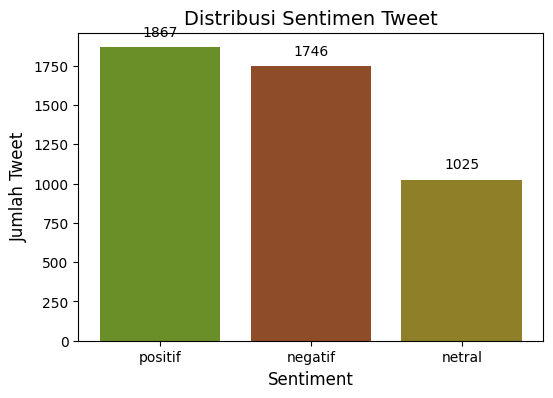

✅ Bar chart disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/distribusi_sentimen_chart.png


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Hitung distribusi label ===
df = pd.read_excel("/content/drive/MyDrive/PSDM/LENGKAP/DANANTARA_MODIFIED PROMPT.xlsx")
label_counts = df['predicted_label'].value_counts().reset_index()
label_counts.columns = ['sentiment', 'text']

# === 2. Tabel dengan warna (style background gradient) ===
styled_table = label_counts.style.background_gradient(cmap="Purples")

# Simpan tabel ke Excel dengan format warna
output_table_path = "/content/drive/MyDrive/PSDM/LENGKAP/distribusi_sentimen.xlsx"
styled_table.to_excel(output_table_path, index=False, engine="openpyxl")

print(f"✅ Tabel distribusi disimpan ke {output_table_path}")

# === 3. Bar Chart ===
colors = ['#6a8e28', '#8e4c28', '#8e7f28']

plt.figure(figsize=(6,4))
bars = plt.bar(label_counts['sentiment'], label_counts['text'], color=colors[:len(label_counts)])
plt.title("Distribusi Sentimen Tweet", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)

# Tambahkan angka di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval),
             ha='center', va='bottom', fontsize=10)

# Simpan chart ke GDrive
output_chart_path = "/content/drive/MyDrive/PSDM/LENGKAP/distribusi_sentimen_chart.png"
plt.savefig(output_chart_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Bar chart disimpan ke {output_chart_path}")


In [ ]:
!pip install --upgrade plotly
!pip install -U kaleido

In [1]:
!plotly_get_chrome


Plotly will install a copy of Google Chrome to be used for generating static images of plots.
Chrome will be installed at: None
Do you want to proceed? [y/n] y
Installing Chrome for Plotly...
Chrome installed successfully.
The Chrome executable is now located at: /usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome


In [2]:
import pandas as pd
import plotly.express as px

# 1. Baca data
df = pd.read_excel("/content/drive/MyDrive/PSDM/LENGKAP/DANANTARA_MODIFIED PROMPT.xlsx")
label_counts = df['predicted_label'].value_counts().reset_index()
label_counts.columns = ['Sentiment', 'Jumlah Tweet']

# 2. Warna sesuai permintaan
colors = ['#4c288e', '#8f7e28', '#286a8e']

# 3. Buat funnel chart
fig = px.funnel_area(
    label_counts,
    names="Sentiment",
    values="Jumlah Tweet",
    color="Sentiment",
    color_discrete_sequence=colors
)

fig.update_layout(
    title="Funnel-Chart of Sentiment Distribution",
    title_x=0.5,  # posisi horizontal title (0 = kiri, 0.5 = tengah, 1 = kanan)
    font=dict(size=12)
)

# 4. Simpan chart ke file
funnel_path = "/content/drive/MyDrive/PSDM/LENGKAP/funnel_sentimen.png"
fig.write_image(funnel_path)

fig.show()

print(f"✅ Funnel chart disimpan ke {funnel_path}")

✅ Funnel chart disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/funnel_sentimen.png


✅ Hasil rata-rata kata per label disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/avg_word_count_per_label.xlsx


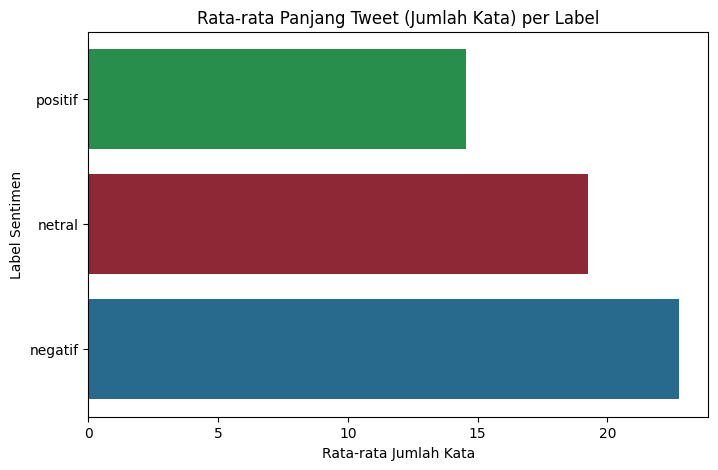

✅ Bar chart disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/avg_word_count_per_label.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Baca data
df = pd.read_excel("/content/drive/MyDrive/PSDM/LENGKAP/DANANTARA_MODIFIED PROMPT.xlsx")

# 2. Hitung jumlah kata di setiap tweet
df['word_count'] = df['full_text'].astype(str).apply(lambda x: len(x.split()))

# 3. Hitung rata-rata jumlah kata per label
avg_word_count = df.groupby('predicted_label')['word_count'].mean().reset_index()
avg_word_count.columns = ['Label', 'Rata-rata Jumlah Kata']

# 4. Simpan hasil ke Excel
avg_path = "/content/drive/MyDrive/PSDM/LENGKAP/avg_word_count_per_label.xlsx"
avg_word_count.to_excel(avg_path, index=False)

print(f"✅ Hasil rata-rata kata per label disimpan ke {avg_path}")

# 5. Visualisasi bar chart horizontal
colors = ['#286a8e', '#8e2837', '#288e4c']  # urutkan sesuai label

plt.figure(figsize=(8,5))
plt.barh(avg_word_count['Label'], avg_word_count['Rata-rata Jumlah Kata'], color=colors)
plt.xlabel("Rata-rata Jumlah Kata")
plt.ylabel("Label Sentimen")
plt.title("Rata-rata Panjang Tweet (Jumlah Kata) per Label")

# Simpan grafik
chart_path = "/content/drive/MyDrive/PSDM/LENGKAP/avg_word_count_per_label.png"
plt.savefig(chart_path, bbox_inches="tight")
plt.show()

print(f"✅ Bar chart disimpan ke {chart_path}")


In [4]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00


In [6]:
import pandas as pd
import re
from collections import Counter
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# 1. Baca data
df = pd.read_excel("/content/drive/MyDrive/PSDM/LENGKAP/DANANTARA_MODIFIED PROMPT.xlsx")

# 2. Gabungkan semua teks
all_text = " ".join(df['full_text'].astype(str).tolist())

# 3. Preprocessing (huruf kecil, hapus non-huruf)
all_text = all_text.lower()
all_text = re.sub(r'[^a-zA-Z\s]', ' ', all_text)  # hanya huruf dan spasi

# 4. Tokenisasi
words = all_text.split()

# 5. Stopwords bahasa Indonesia
stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())

# 6. Filter stopwords + kata pendek (<=2 huruf)
filtered_words = [w for w in words if w not in stopwords and len(w) > 2]

# 7. Hitung frekuensi kata
word_counts = Counter(filtered_words)

# 8. Ambil 20 kata paling umum
common_words = word_counts.most_common(20)

# 9. Masukkan ke DataFrame
df_common = pd.DataFrame(common_words, columns=['Common Word', 'Count'])

# 10. Styling tabel (warna ungu gradient di kolom Count)
styled_table = df_common.style.background_gradient(subset=['Count'], cmap="Purples")

# 11. Simpan ke Excel (tanpa styling karena Excel tidak support Styler)
output_path = "/content/drive/MyDrive/PSDM/LENGKAP/top20_common_words.xlsx"
df_common.to_excel(output_path, index=False)

styled_table


,Common Word,Count
0,danantara,5233
1,https,1175
2,danantaraporosinvestasi,652
3,investasi,651
4,jadi,624
5,danantarabangunnegeri,619
6,ekonomi,604
7,indonesia,586
8,bumn,558
9,terpercaya,557


In [8]:
!pip install squarify

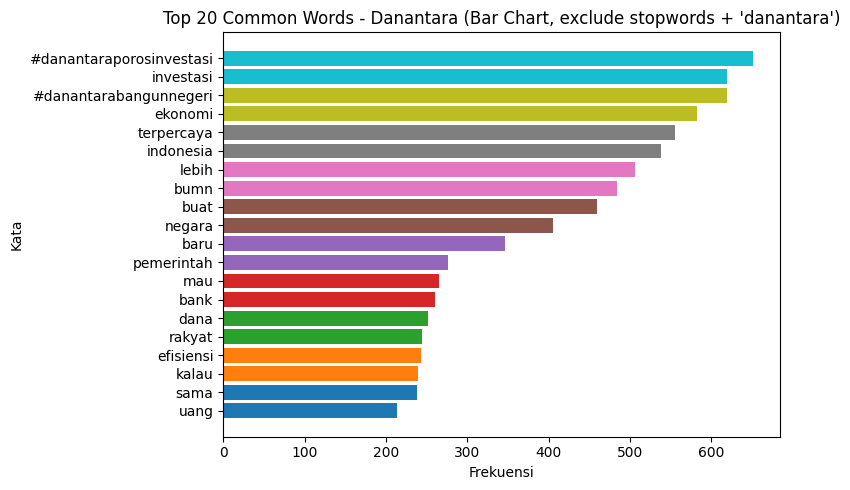

✅ Bar chart disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/top20_common_words_bar_exclude_danantara.png


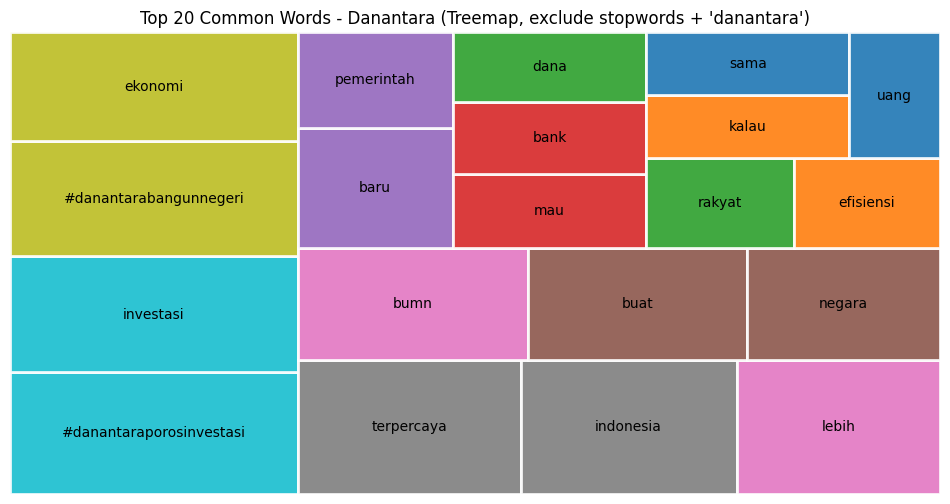

✅ Treemap disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/top20_common_words_treemap_exclude_danantara.png


In [12]:
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# --- Stopwords Sastrawi ---
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

# --- Custom stopwords tambahan (misalnya 'danantara') ---
custom_stopwords = {"danantara", "jadi","apa","aja"}
stopwords = stopwords.union(custom_stopwords)

# --- Preprocessing untuk semua teks ---
all_words = []
for text in df['full_text'].dropna().tolist():
    for word in text.lower().split():
        if len(word) > 2 and word not in stopwords:
            all_words.append(word)

# Hitung frekuensi kata
df_common = pd.Series(all_words).value_counts().reset_index()
df_common.columns = ['Common Word', 'Count']
df_common = df_common.head(20)  # ambil 20 kata teratas

# Buat daftar warna (warna-warni dengan colormap tab10)
colors = cm.tab10_r(np.linspace(0, 1, len(df_common)))

# --- Bar Chart Horizontal ---
plt.figure(figsize=(8,5))
plt.barh(df_common['Common Word'], df_common['Count'], color=colors)
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.title("Top 20 Common Words - Danantara (Bar Chart, exclude stopwords + 'danantara')")
plt.gca().invert_yaxis()
plt.tight_layout()

bar_path = "/content/drive/MyDrive/PSDM/LENGKAP/top20_common_words_bar_exclude_danantara.png"
plt.savefig(bar_path, bbox_inches="tight")
plt.show()

print(f"✅ Bar chart disimpan ke {bar_path}")

# --- Treemap ---
plt.figure(figsize=(12,6))
squarify.plot(
    sizes=df_common['Count'],
    label=df_common['Common Word'],
    color=colors,
    alpha=0.9,
    linewidth=2,          # ketebalan garis
    edgecolor="white"     # warna garis pemisah
)

plt.title("Top 20 Common Words - Danantara (Treemap, exclude stopwords + 'danantara')")
plt.axis('off')

tree_path = "/content/drive/MyDrive/PSDM/LENGKAP/top20_common_words_treemap_exclude_danantara.png"
plt.savefig(tree_path, bbox_inches="tight")
plt.show()

print(f"✅ Treemap disimpan ke {tree_path}")



=== POSITIF ===


,Common Word,Count
0,#danantaraporosinvestasi,648
1,#danantarabangunnegeri,581
2,terpercaya,524
3,ekonomi,481
4,investasi,430
5,lebih,380
6,indonesia,377
7,baru,201
8,depan,165
9,masa,155


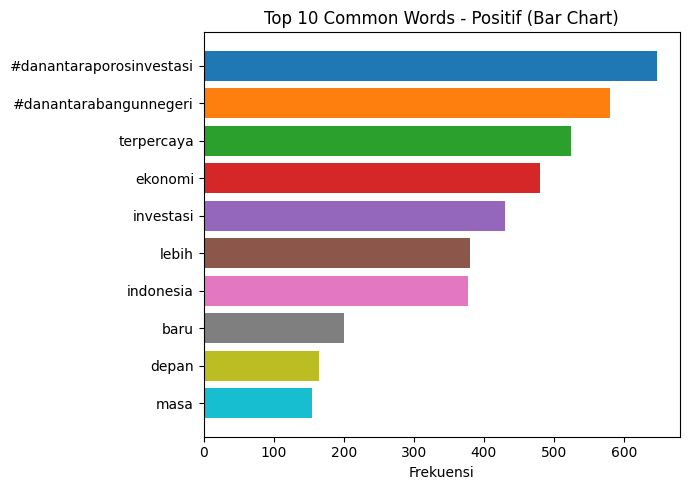

✅ Bar chart disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/top10_common_words_bar_positif_exclude_danantara.png


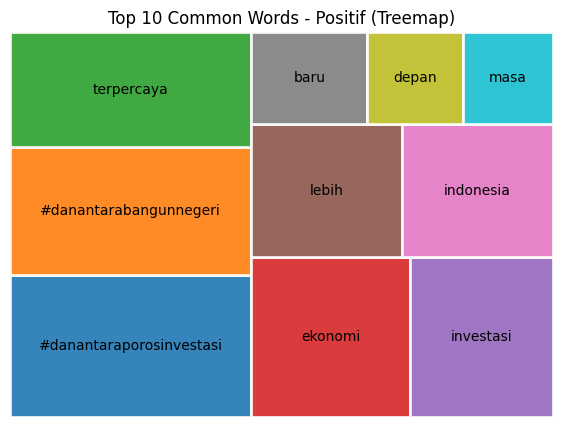

✅ Treemap disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/top10_common_words_treemap_positif_exclude_danantara.png

=== NEGATIF ===


,Common Word,Count
0,bumn,241
1,negara,207
2,bank,161
3,dana,152
4,rakyat,151
5,sama,137
6,uang,131
7,korupsi,122
8,efisiensi,119
9,investasi,117


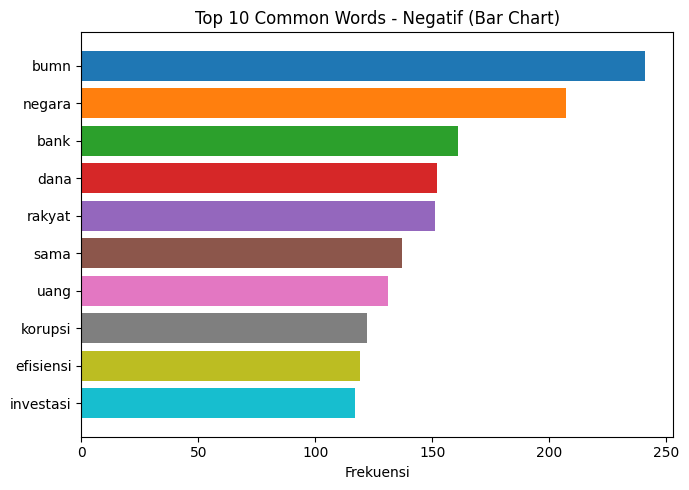

✅ Bar chart disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/top10_common_words_bar_negatif_exclude_danantara.png


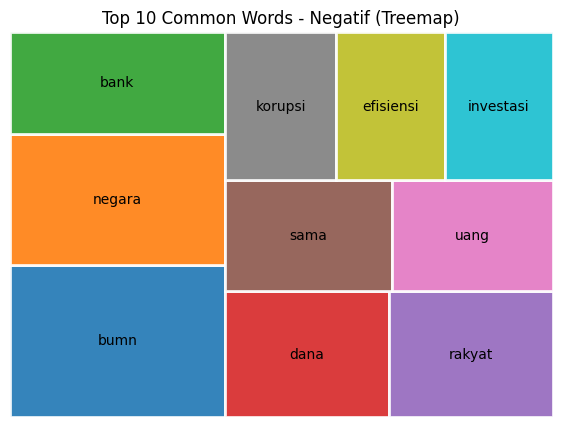

✅ Treemap disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/top10_common_words_treemap_negatif_exclude_danantara.png

=== NETRAL ===


,Common Word,Count
0,bumn,135
1,bank,77
2,investasi,73
3,negara,72
4,baru,64
5,danantara.,63
6,sama,63
7,uang,62
8,dana,61
9,efisiensi,61


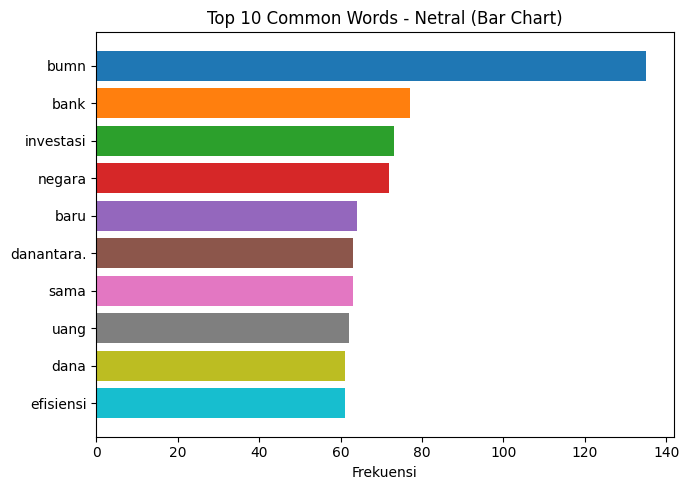

✅ Bar chart disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/top10_common_words_bar_netral_exclude_danantara.png


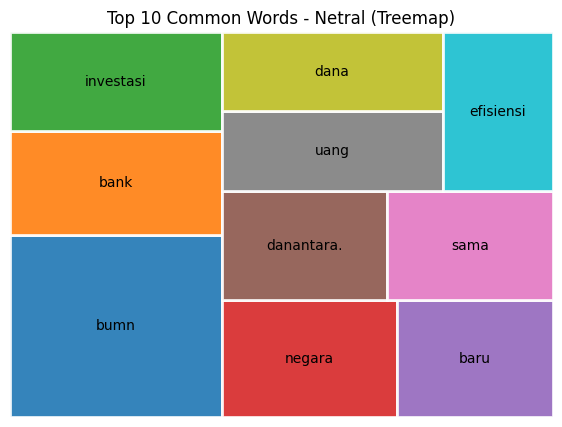

✅ Treemap disimpan ke /content/drive/MyDrive/PSDM/LENGKAP/top10_common_words_treemap_netral_exclude_danantara.png


In [16]:
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# --- Stopwords Sastrawi ---
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

# --- Tambahkan stopwords manual ---
custom_stopwords = {"danantara","jadi","aja","apa","mau","gak","buat","kalo","kalau"}   # bisa tambahkan kata lain jika perlu
stopwords = stopwords.union(custom_stopwords)

# Fungsi untuk ambil top common words per label
def get_common_words_by_label(df, label, top_n=10):
    texts = df[df['predicted_label'].str.lower() == label]['full_text'].dropna().tolist()
    words = []
    for text in texts:
        for word in text.lower().split():
            # buang kata <=2 huruf dan stopwords (Sastrawi + custom)
            if len(word) > 2 and word not in stopwords:
                words.append(word)
    word_freq = pd.Series(words).value_counts().reset_index()
    word_freq.columns = ["Common Word", "Count"]
    return word_freq.head(top_n)

# Warna berbeda untuk bar & treemap
def get_colors(n):
    return cm.tab10(np.linspace(0, 1, n))

# Buat visualisasi untuk tiap label
for label in ["positif", "negatif", "netral"]:
    print(f"\n=== {label.upper()} ===")

    # Ambil data
    df_common_label = get_common_words_by_label(df, label, top_n=10)
    display(df_common_label.style.background_gradient(cmap="Purples", subset=["Count"]))

    # --- Bar Chart Horizontal ---
    colors = get_colors(len(df_common_label))
    plt.figure(figsize=(7,5))
    plt.barh(df_common_label["Common Word"], df_common_label["Count"], color=colors)
    plt.xlabel("Frekuensi")
    plt.title(f"Top 10 Common Words - {label.capitalize()} (Bar Chart)")
    plt.gca().invert_yaxis()
    plt.tight_layout()

    bar_path = f"/content/drive/MyDrive/PSDM/LENGKAP/top10_common_words_bar_{label}_exclude_danantara.png"
    plt.savefig(bar_path, bbox_inches="tight")
    plt.show()
    print(f"✅ Bar chart disimpan ke {bar_path}")

    # --- Treemap ---
    plt.figure(figsize=(7,5))
    squarify.plot(
        sizes=df_common_label["Count"],
        label=df_common_label["Common Word"],
        color=colors,
        alpha=0.9,
        linewidth=2,
        edgecolor="white"
    )
    plt.title(f"Top 10 Common Words - {label.capitalize()} (Treemap)")
    plt.axis('off')

    tree_path = f"/content/drive/MyDrive/PSDM/LENGKAP/top10_common_words_treemap_{label}_exclude_danantara.png"
    plt.savefig(tree_path, bbox_inches="tight")
    plt.show()
    print(f"✅ Treemap disimpan ke {tree_path}")


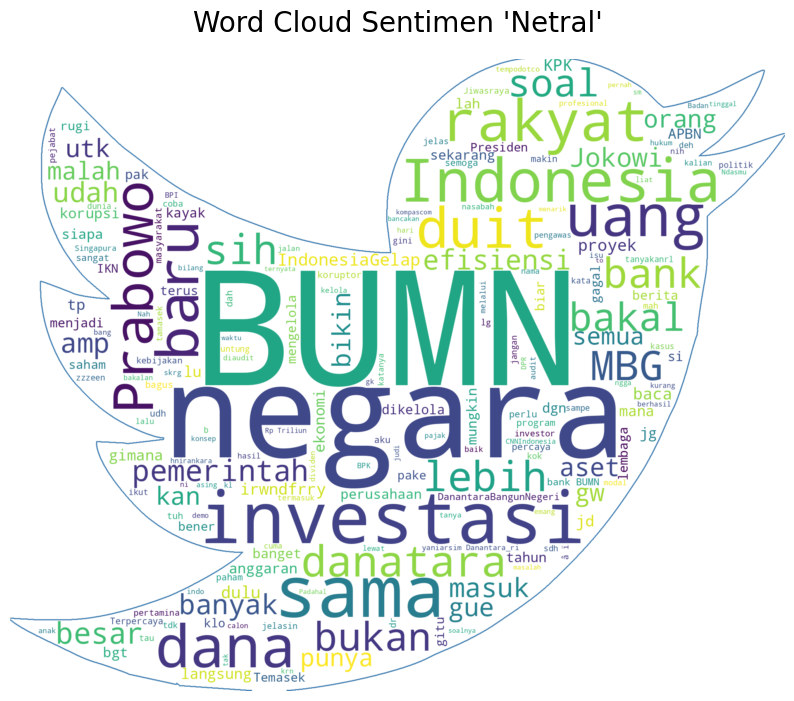

✅ Word cloud 'Word Cloud Sentimen 'Netral'' disimpan di /content/drive/MyDrive/PSDM/LENGKAP/wordclouds/wordcloud_netral.png


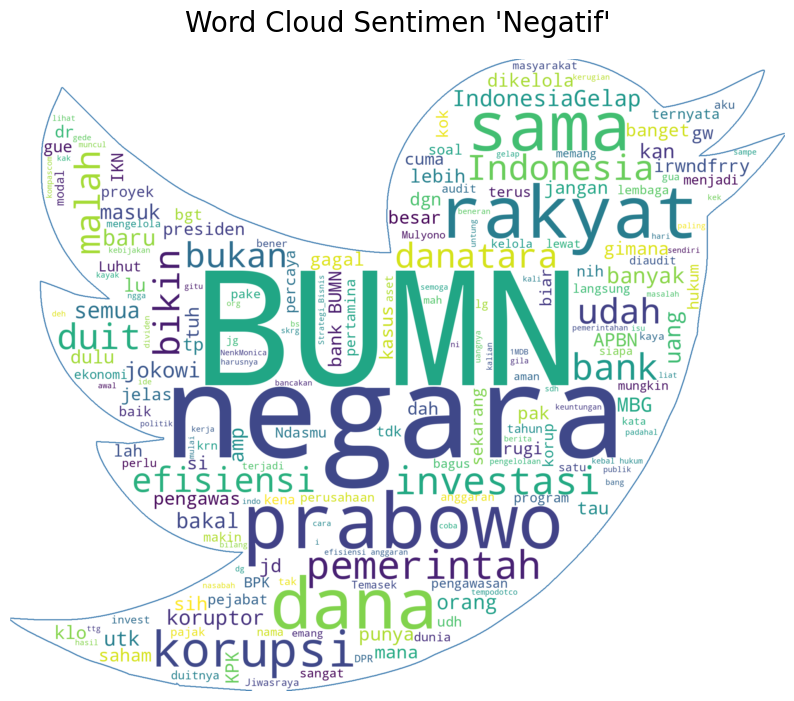

✅ Word cloud 'Word Cloud Sentimen 'Negatif'' disimpan di /content/drive/MyDrive/PSDM/LENGKAP/wordclouds/wordcloud_negatif.png


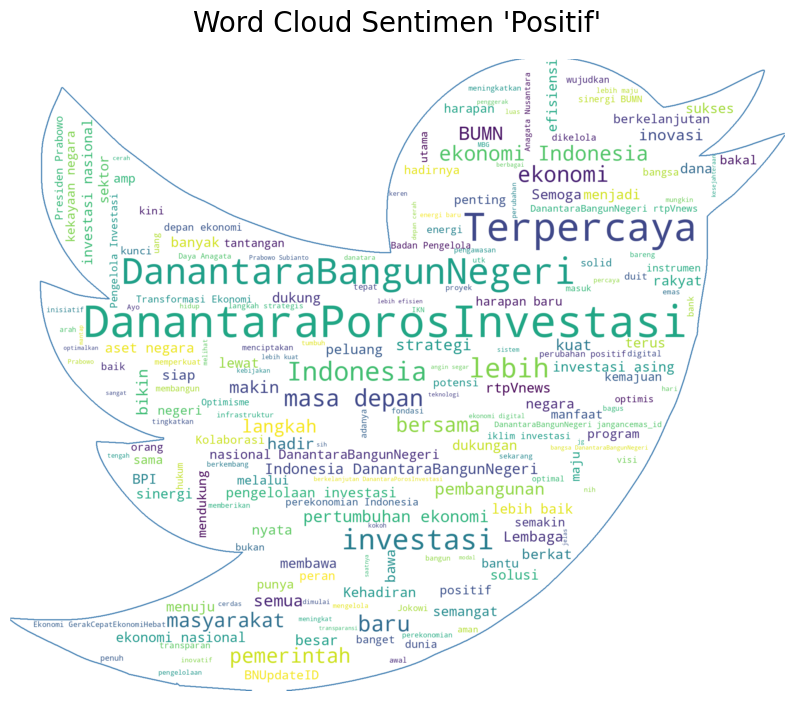

✅ Word cloud 'Word Cloud Sentimen 'Positif'' disimpan di /content/drive/MyDrive/PSDM/LENGKAP/wordclouds/wordcloud_positif.png


In [19]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import os

# 1. Baca dataset
df = pd.read_excel("/content/drive/MyDrive/PSDM/LENGKAP/DANANTARA_MODIFIED PROMPT.xlsx")

# 2. Load masker Twitter
twitter_mask = np.array(Image.open("/content/drive/MyDrive/PSDM/LENGKAP/twitter-seeklogo.png"))
twitter_mask_invert = np.invert(twitter_mask)

# 3. Stopwords bahasa Indonesia (Sastrawi) + tambahan
factory = StopWordRemoverFactory()
indo_stopwords = set(factory.get_stop_words())
custom_stopwords = indo_stopwords.union({
    'yg','jadi','aja','ga','gak','rt','t','apa','dll','danantara','t.co','https','co','nya','buat','mau','kalau','kalo'
})

# 4. Buat folder output jika belum ada
save_dir = "/content/drive/MyDrive/PSDM/LENGKAP/wordclouds"
os.makedirs(save_dir, exist_ok=True)

# 5. Fungsi untuk membuat dan menyimpan wordcloud
def create_wordcloud(text, title, mask, save_path):
    wordcloud = WordCloud(
        stopwords=custom_stopwords,
        mask=mask,
        background_color="white",
        contour_color='steelblue',
        contour_width=2,
        max_words=200,
        min_font_size=5,
        random_state=42
    ).generate(text)

    # Tampilkan
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title, fontsize=20, pad=20)
    plt.axis('off')
    plt.show()

    # Simpan ke GDrive
    wordcloud.to_file(save_path)
    print(f"✅ Word cloud '{title}' disimpan di {save_path}")

# 6. Buat wordcloud untuk tiap label
for label in df['predicted_label'].unique():
    text = " ".join(df[df['predicted_label'] == label]['full_text'].astype(str))
    if text.strip():
        save_path = os.path.join(save_dir, f"wordcloud_{label}.png")
        create_wordcloud(
            text,
            f"Word Cloud Sentimen '{label.capitalize()}'",
            twitter_mask_invert,
            save_path
        )
